In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px # for choropleth map and plotly visualization
from matplotlib.animation import FuncAnimation
import plotly.graph_objects as go # for racing bar plot ......

load dataset

In [ ]:
df=pd.read_csv('/content/dataset (2).csv')

In [ ]:
df.head(6)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMEB3FV6N,Monroe,Key West,FL,33040,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,NaN,198968248,POINT (-81.80023 24.5545),NaN,12087972100
1,1G1RD6E45D,Clark,Laughlin,NV,89029,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,NaN,5204412,POINT (-114.57245 35.16815),NaN,32003005702
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,15.0,218972519,POINT (-120.50721 46.60448),PACIFICORP,53077001602
3,1G1FW6S08H,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,39.0,186750406,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,53057951101
4,3FA6P0SU1K,Snohomish,Everett,WA,98201,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,38.0,2006714,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,53061041500
5,5YJ3E1EB5J,Snohomish,Bothell,WA,98021,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,1.0,475635324,POINT (-122.18384 47.8031),PUGET SOUND ENERGY INC,53061051916


In [ ]:
df.tail(6)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
112628,WA1E2AFY7L,King,Seattle,WA,98177,2020,AUDI,Q5 E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20,0,32.0,9880104,POINT (-122.36498 47.72238),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033000500
112629,7SAYGDEF2N,King,Duvall,WA,98019,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,45.0,217955265,POINT (-121.98609 47.74068),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033032401
112630,1N4BZ1CP7K,San Juan,Friday Harbor,WA,98250,2019,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,150,0,40.0,103663227,POINT (-123.01648 48.53448),BONNEVILLE POWER ADMINISTRATION||ORCAS POWER &...,53055960301
112631,1FMCU0KZ4N,King,Vashon,WA,98070,2022,FORD,ESCAPE,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,34.0,193878387,POINT (-122.4573 47.44929),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033027702
112632,KNDCD3LD4J,King,Covington,WA,98042,2018,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,47.0,125039043,POINT (-122.09124 47.33778),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033032007
112633,YV4BR0CL8N,King,Covington,WA,98042,2022,VOLVO,XC90,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,18,0,47.0,194673692,POINT (-122.09124 47.33778),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033032005


In [ ]:
print(df.shape)

(112634, 17)


In [ ]:
print(df.columns)

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         112634 non-null  object 
 1   County                                             112634 non-null  object 
 2   City                                               112634 non-null  object 
 3   State                                              112634 non-null  object 
 4   Postal Code                                        112634 non-null  int64  
 5   Model Year                                         112634 non-null  int64  
 6   Make                                               112634 non-null  object 
 7   Model                                              112614 non-null  object 
 8   Electric Vehicle Type                              112634 non-null  object

In [ ]:
df.describe() # summary statistics


,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,112634.000000,112634.000000,112634.000000,112634.000000,112348.000000,1.126340e+05,1.126340e+05
mean,98156.226850,2019.003365,87.812987,1793.439681,29.805604,1.994567e+08,5.296650e+10
std,2648.733064,2.892364,102.334216,10783.753486,14.700545,9.398427e+07,1.699104e+09
min,1730.000000,1997.000000,0.000000,0.000000,1.000000,4.777000e+03,1.101001e+09
25%,98052.000000,2017.000000,0.000000,0.000000,18.000000,1.484142e+08,5.303301e+10
50%,98119.000000,2020.000000,32.000000,0.000000,34.000000,1.923896e+08,5.303303e+10
75%,98370.000000,2022.000000,208.000000,0.000000,43.000000,2.191899e+08,5.305307e+10
max,99701.000000,2023.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.603300e+10


Data Cleaning & Preprocessing

In [ ]:
df.isnull().sum() # missing values

,0
VIN (1-10),0
County,0
City,0
State,0
Postal Code,0
Model Year,0
Make,0
Model,20
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


In [ ]:
# Check for missing values
#print(df.isnull().sum())

# Drop rows or handle missing values accordingly
df.dropna(subset=['VIN (1-10)', 'Make', 'Electric Vehicle Type'], inplace=True)

# Convert necessary columns to appropriate data types
df['Model Year'] = df['Model Year'].astype(int)
df['Electric Range'] = df['Electric Range'].astype(float)



 Exploratory Data Analysis (EDA)

Task 1: Univariate & Bivariate

Objective: Perform EDA to get insights from the dataset. Focus on distribution, relationships, and patterns in the data.

Instructions:

Perform univariate analysis (like histograms) for single variables.

Perform bivariate analysis (correlation, scatter plots, etc.).

In [ ]:
# Display unique values for categorical columns
print("Unique values in 'Make':", df['Make'].nunique())
print("Unique values in 'Electric Vehicle Type':", df['Electric Vehicle Type'].nunique())

Unique values in 'Make': 34
Unique values in 'Electric Vehicle Type': 2


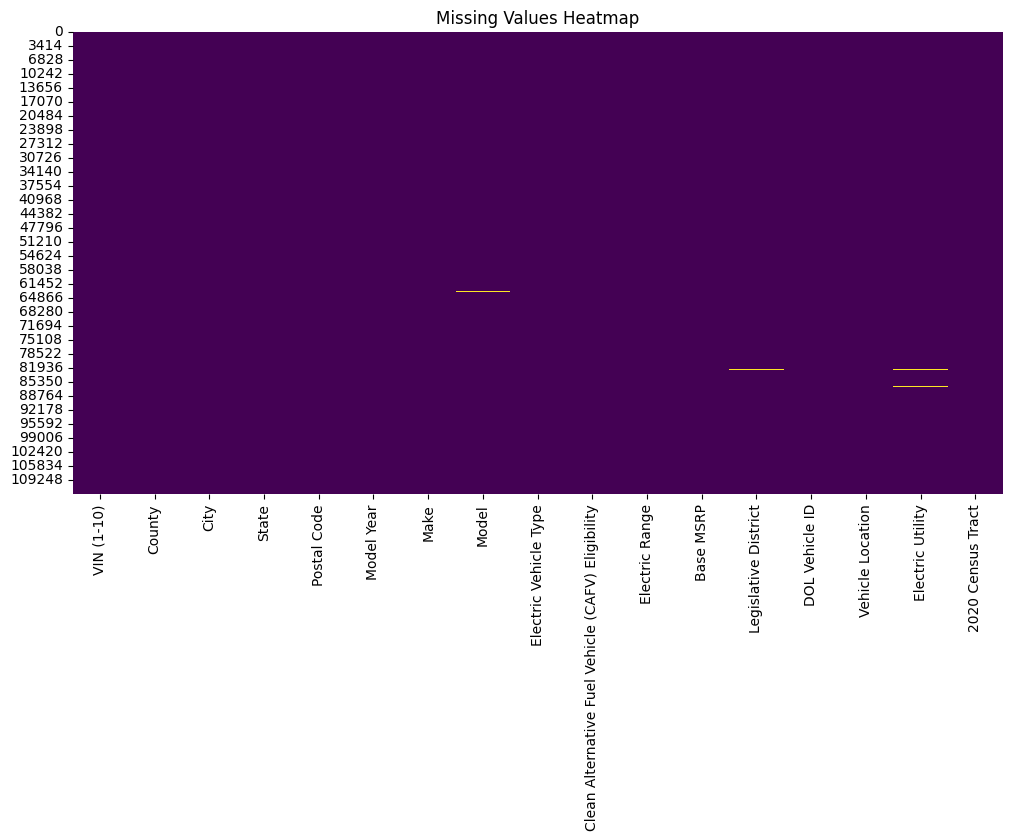

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()

# Visualize missing values using a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


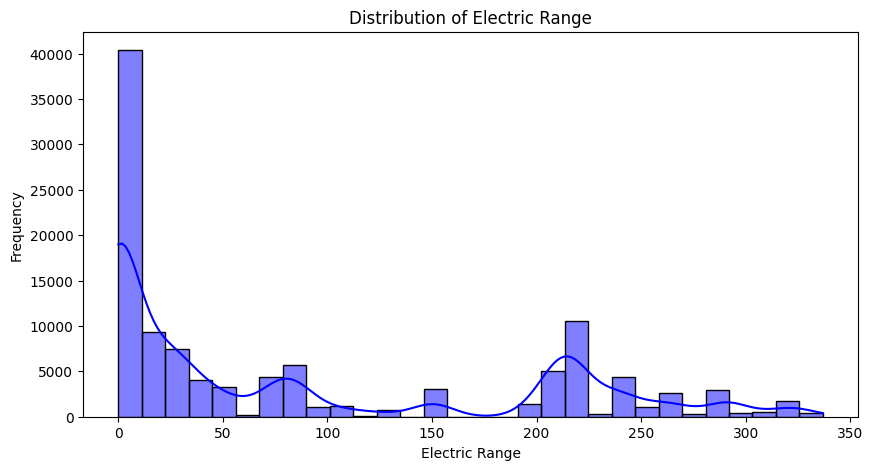

In [ ]:
# Distribution of Electric Range
plt.figure(figsize=(10, 5))
sns.histplot(df['Electric Range'], bins=30, kde=True, color='blue')
plt.title('Distribution of Electric Range')
plt.xlabel('Electric Range')
plt.ylabel('Frequency')
plt.show()






<ipython-input-35-892bb5dd2a2b>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning

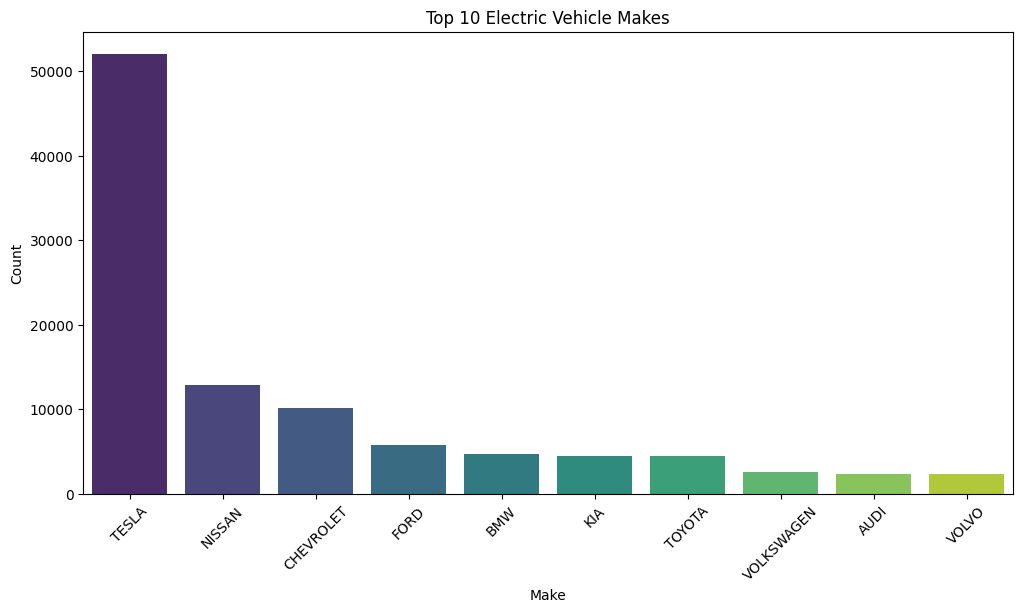

In [ ]:
# Count plot for EV Make
plt.figure(figsize=(12, 6))
top_makes = df['Make'].value_counts().nlargest(10)
sns.barplot(x=top_makes.index, y=top_makes.values, palette='viridis')
plt.title('Top 10 Electric Vehicle Makes')
plt.xlabel('Make')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<ipython-input-36-a3908e8a4138>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



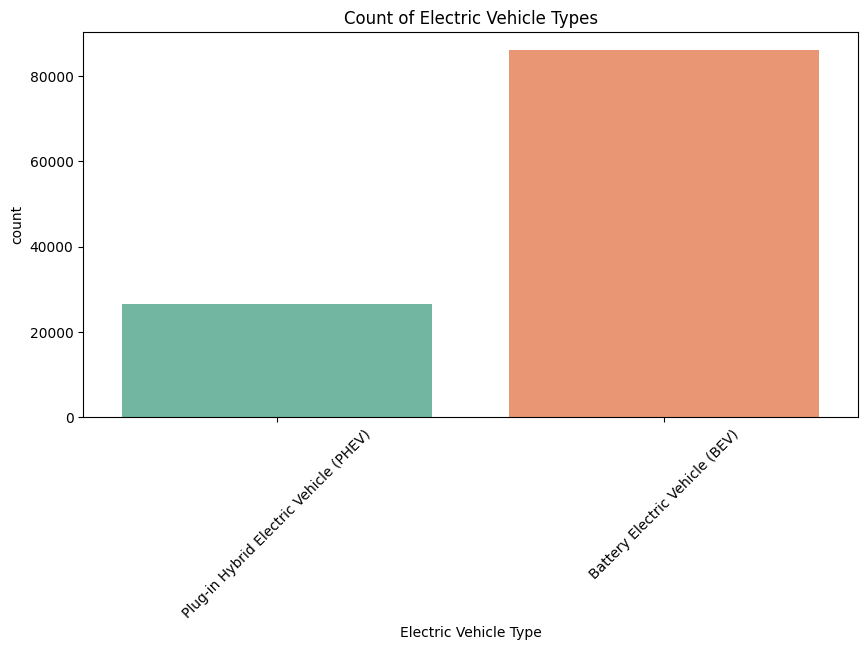

In [ ]:

# Count plot for Electric Vehicle Type
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Electric Vehicle Type', palette='Set2')
plt.title('Count of Electric Vehicle Types')
plt.xticks(rotation=45)
plt.show()

 Bivariate Analysis

Objective: Investigate relationships between two features.

Instructions:

Use scatter plots, box plots, and correlation matrices.

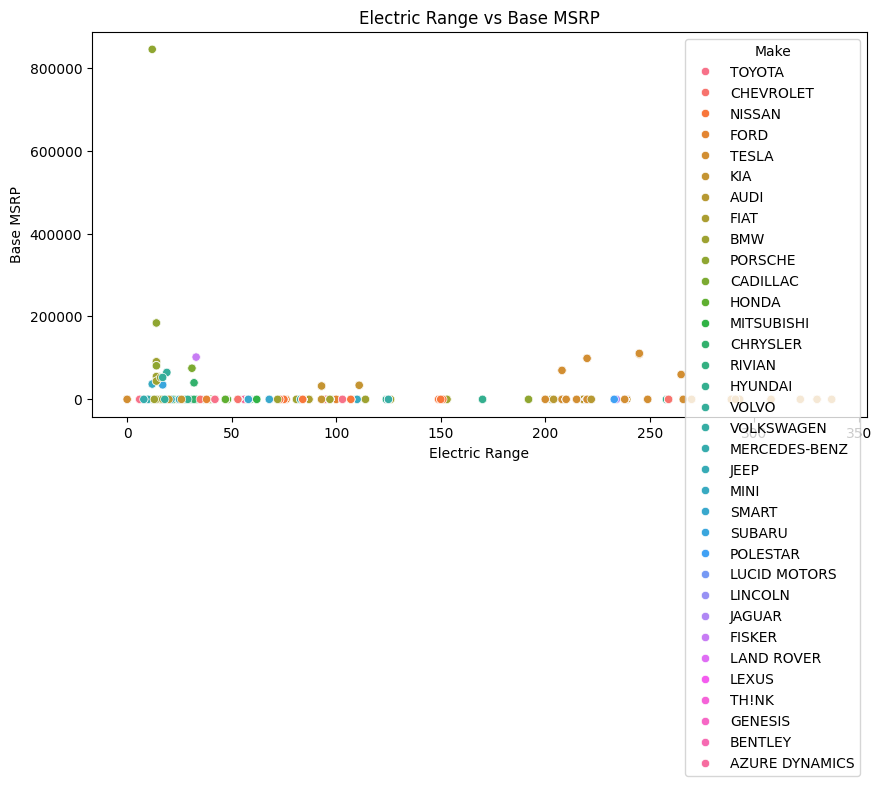

In [ ]:


# Bivariate Analysis - Relationship between Electric Range and Base MSRP
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Electric Range', y='Base MSRP', data=df, hue='Make')
plt.title('Electric Range vs Base MSRP')
plt.show()


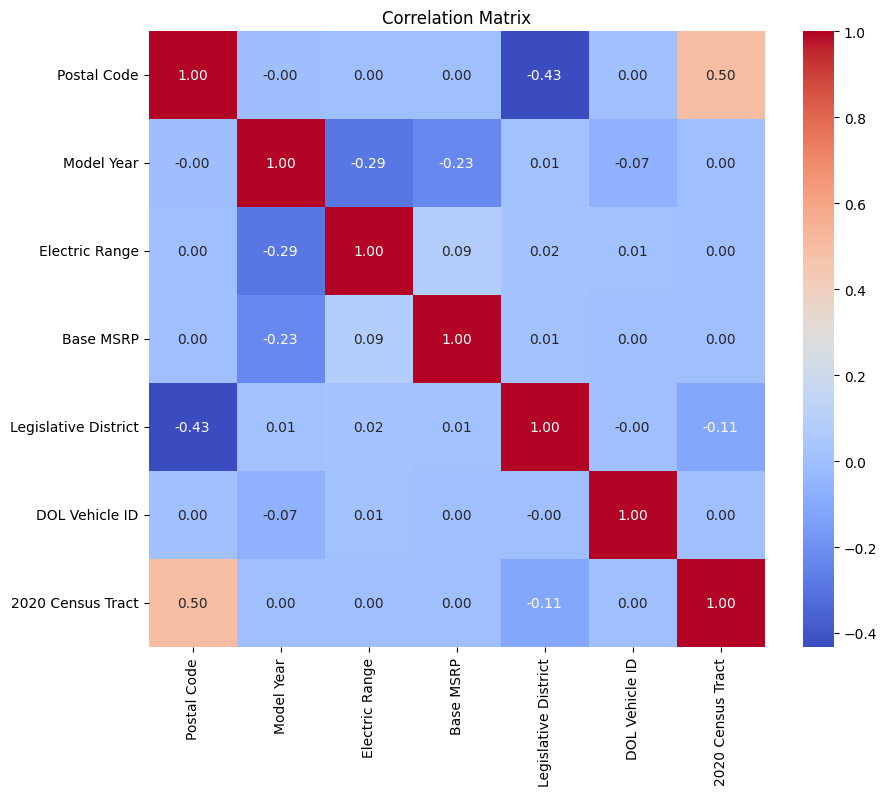

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is already defined and preprocessed

# Step 1: Filter numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Step 2: Calculate the correlation matrix
corr = numeric_df.corr()

# Step 3: Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

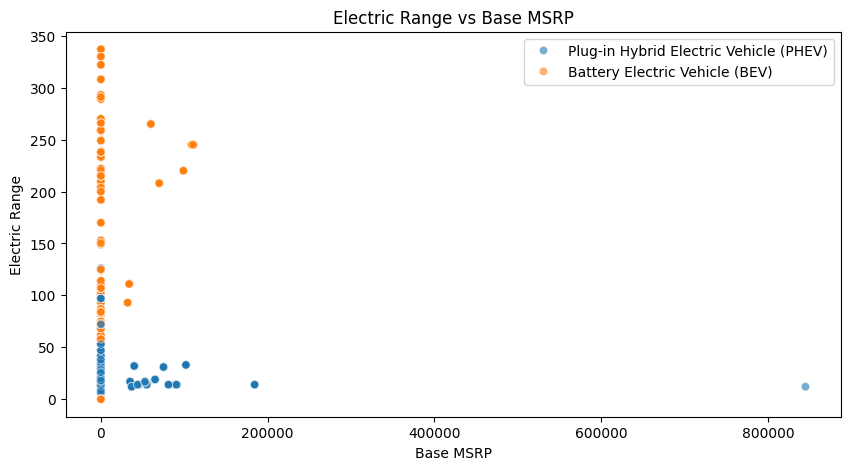

In [ ]:
# Scatter plot for Electric Range vs Base MSRP
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='Base MSRP', y='Electric Range', hue='Electric Vehicle Type', alpha=0.6)
plt.title('Electric Range vs Base MSRP')
plt.xlabel('Base MSRP')
plt.ylabel('Electric Range')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.



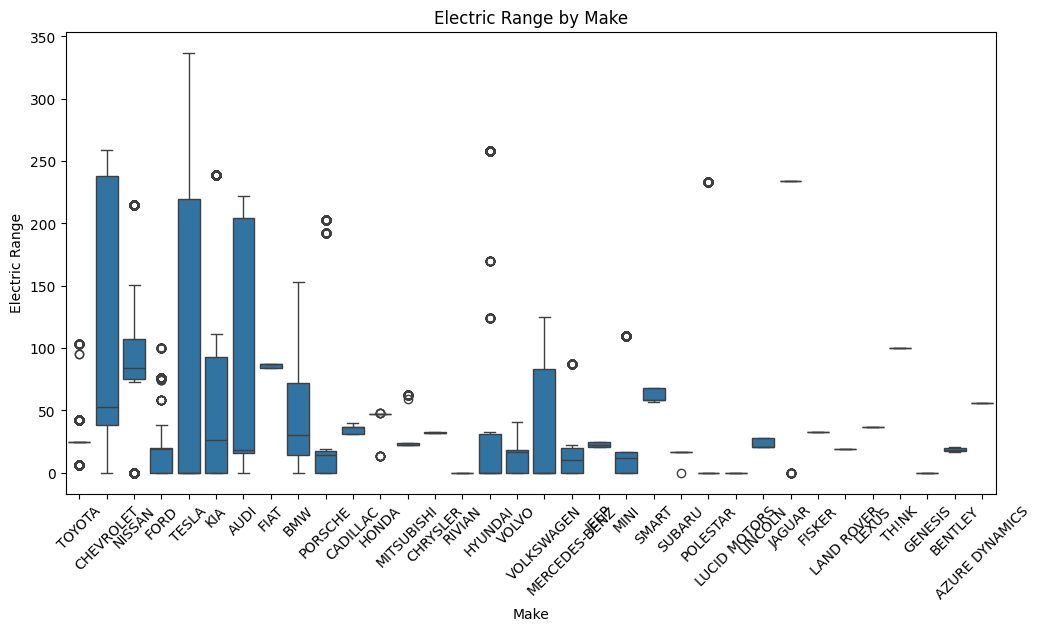

In [ ]:
# Box plot for Electric Range across different Makes
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Make', y='Electric Range')
plt.title('Electric Range by Make')
plt.xticks(rotation=45)
plt.show()

 Advanced Analysis

Objective: Gain deeper insights into specific aspects of the dataset.

Instructions:

Analyze trends over time, using line plots and animations.

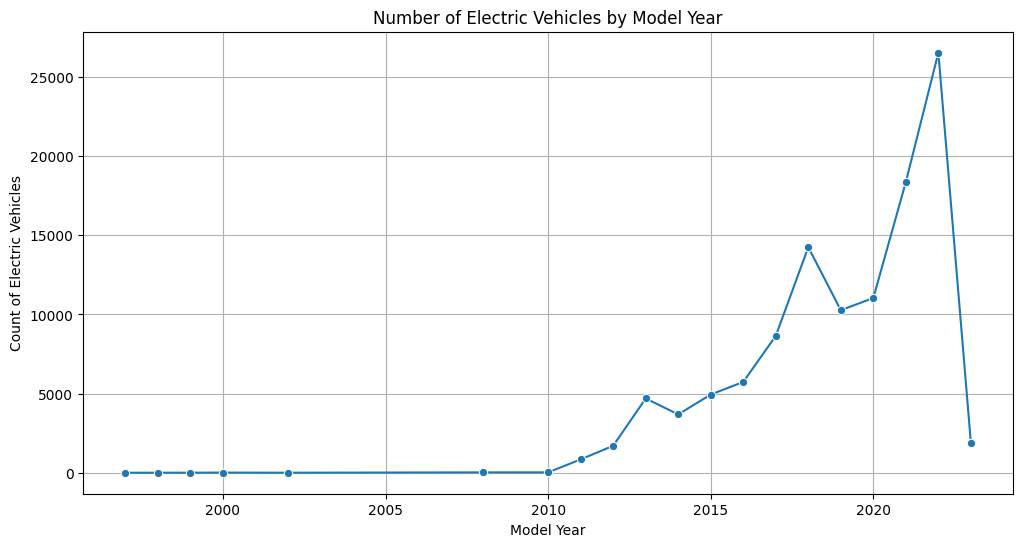

In [ ]:
# Time series analysis: Count of EVs by Model Year
ev_count_by_year = df['Model Year'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x=ev_count_by_year.index, y=ev_count_by_year.values, marker='o')
plt.title('Number of Electric Vehicles by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Count of Electric Vehicles')
plt.grid()
plt.show()

<ipython-input-44-0bf26ca796b0>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning

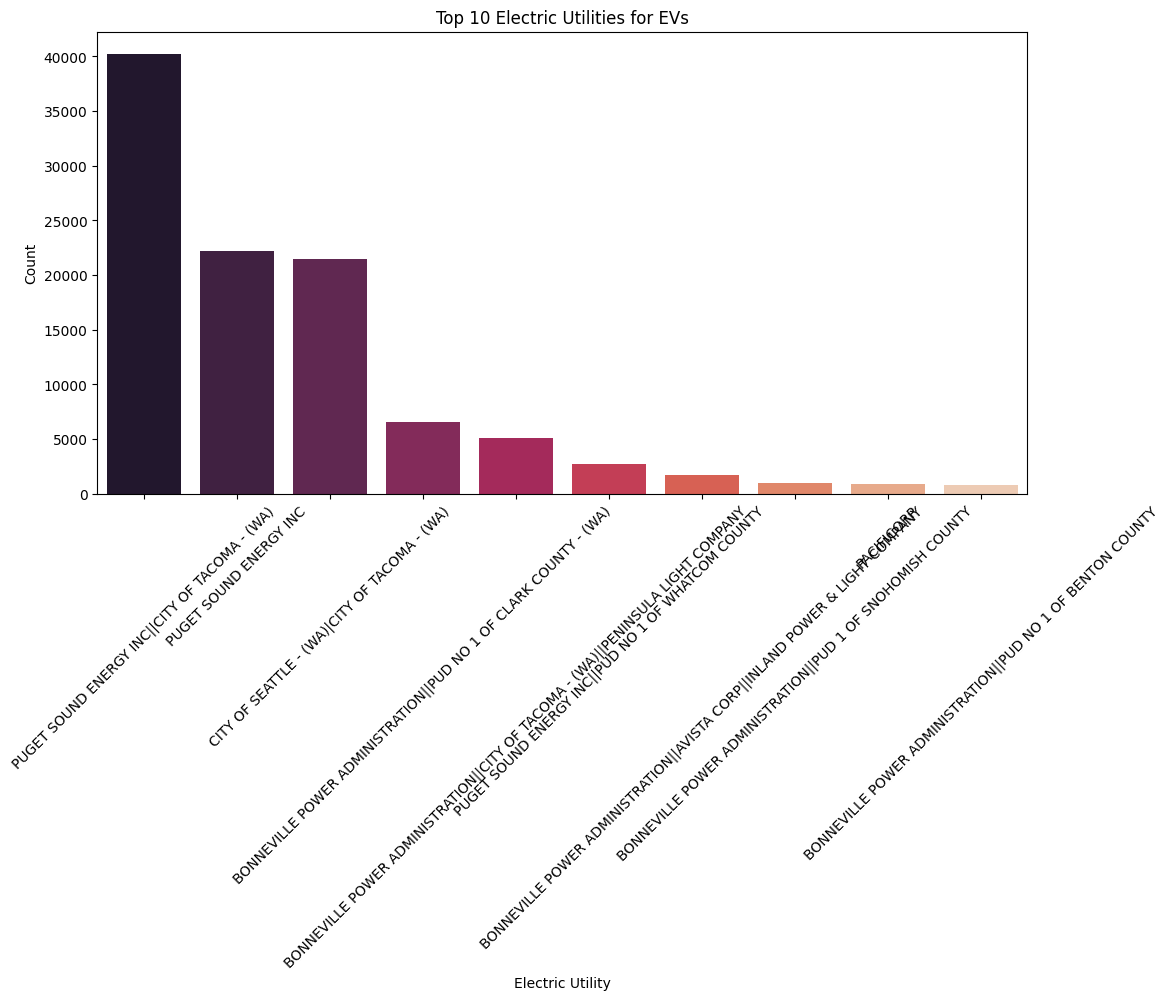

In [ ]:
# Analyze Electric Utility usage
plt.figure(figsize=(12, 6))
top_utilities = df['Electric Utility'].value_counts().nlargest(10)
sns.barplot(x=top_utilities.index, y=top_utilities.values, palette='rocket')
plt.title('Top 10 Electric Utilities for EVs')
plt.xlabel('Electric Utility')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

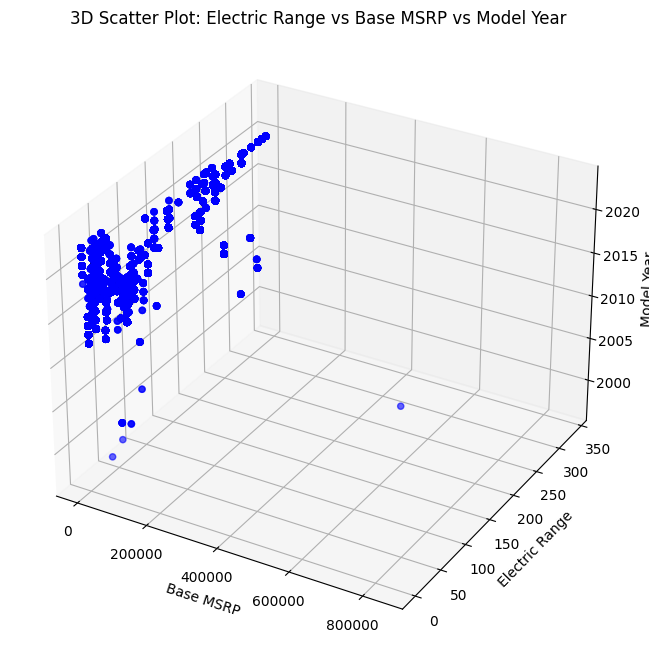

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Creating a 3D scatter plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot points
ax.scatter(df['Base MSRP'], df['Electric Range'], df['Model Year'],
           c='b', marker='o', alpha=0.6)

# Setting labels
ax.set_xlabel('Base MSRP')
ax.set_ylabel('Electric Range')
ax.set_zlabel('Model Year')
ax.set_title('3D Scatter Plot: Electric Range vs Base MSRP vs Model Year')

plt.show()


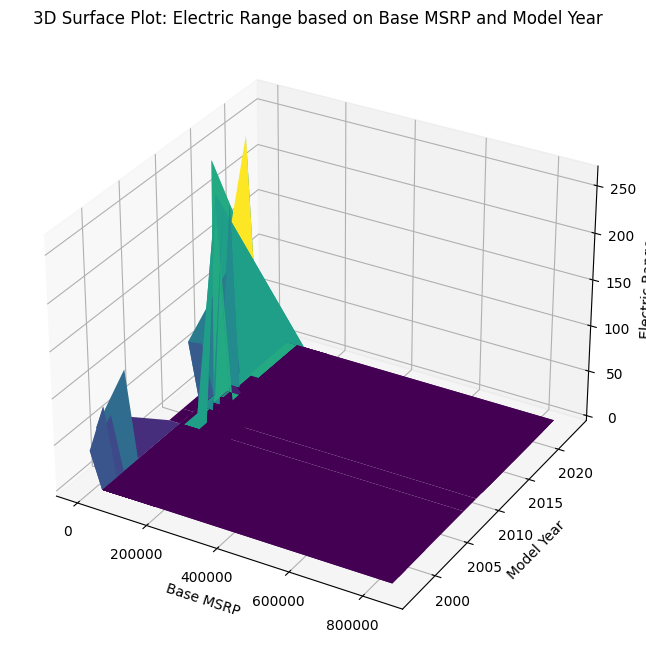

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Create a meshgrid for Base MSRP and Model Year
x = df['Base MSRP']
y = df['Model Year']
x, y = np.meshgrid(x.unique(), y.unique())

# Calculate Z values (Electric Range) for the surface plot
z = np.zeros_like(x)

for i in range(len(x)):
    for j in range(len(y)):
        # Getting the Electric Range for each Base MSRP and Model Year
        electric_range = df[(df['Base MSRP'] == x[i, j]) & (df['Model Year'] == y[i, j])]
        if not electric_range.empty:
            z[i, j] = electric_range['Electric Range'].mean()  # Taking mean for surface

# Creating the surface plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis', edgecolor='none')

# Setting labels
ax.set_xlabel('Base MSRP')
ax.set_ylabel('Model Year')
ax.set_zlabel('Electric Range')
ax.set_title('3D Surface Plot: Electric Range based on Base MSRP and Model Year')

plt.show()


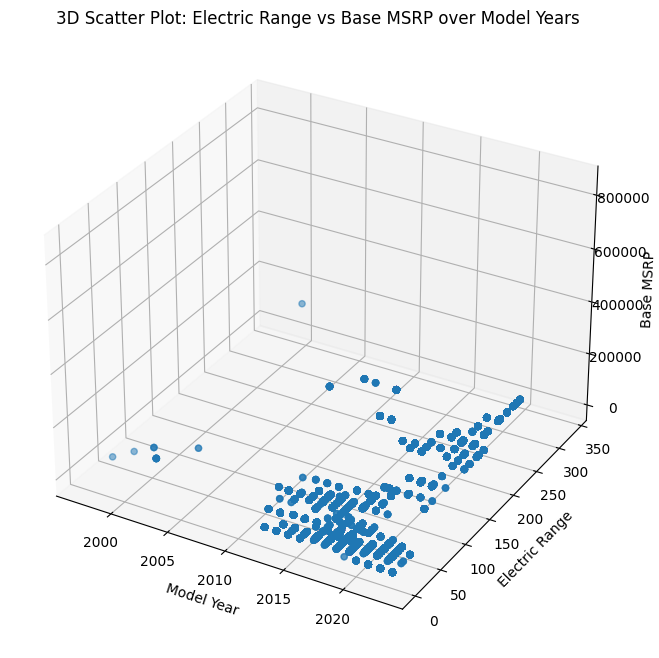

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Create a scatter plot
ax.scatter(df['Model Year'], df['Electric Range'], df['Base MSRP'], alpha=0.5)

ax.set_xlabel('Model Year')
ax.set_ylabel('Electric Range')
ax.set_zlabel('Base MSRP')
ax.set_title('3D Scatter Plot: Electric Range vs Base MSRP over Model Years')
plt.show()



In [ ]:
print(grouped_data.shape)
print(grouped_data.head())


(34, 20)
Model Year      1997  1998  1999  2000  2002  2008  2010  2011  2012  2013  \
Make                                                                         
AUDI             NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
AZURE DYNAMICS   NaN   NaN   NaN   NaN   NaN   NaN   NaN   4.0   3.0   NaN   
BENTLEY          NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
BMW              NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
CADILLAC         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

Model Year       2014   2015   2016   2017   2018   2019   2020   2021   2022  \
Make                                                                            
AUDI              NaN    NaN  214.0  187.0  174.0  392.0  224.0  544.0  585.0   
AZURE DYNAMICS    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
BENTLEY           NaN    NaN    NaN    NaN    NaN    NaN    1.0    1.0    1.0   
BMW             457.0  403.0  383.0  69

In [ ]:
grouped_data = grouped_data.reset_index()


In [ ]:
grouped_data = grouped_data.fillna(0)  # Replace NaNs with zeros


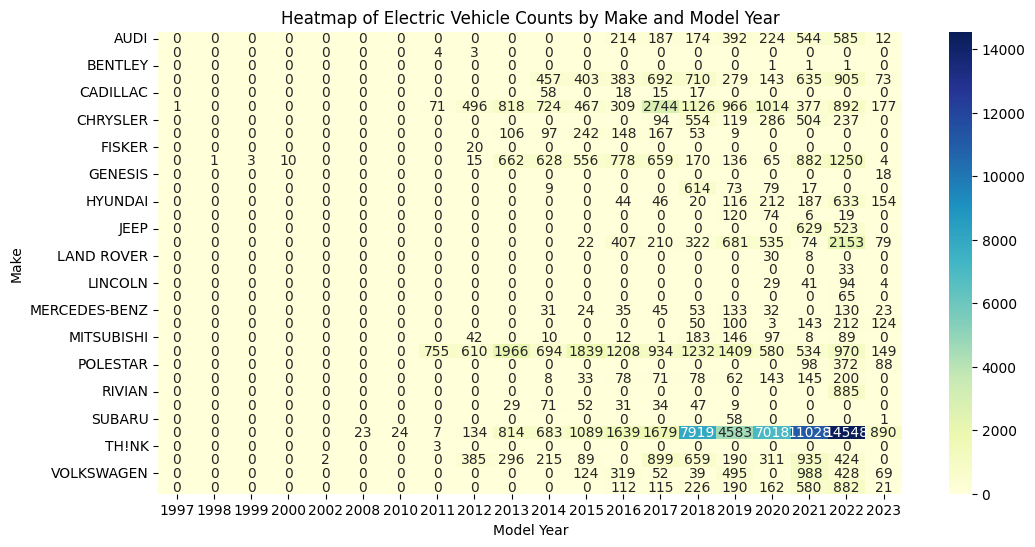

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Grouping data for heatmap
grouped_data = df.groupby(['Make', 'Model Year'])['Electric Range'].count().unstack(fill_value=0)

# Reset index and fill NaNs if any
grouped_data = grouped_data.fillna(0)

# Plotting the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(grouped_data, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of Electric Vehicle Counts by Make and Model Year')
plt.xlabel('Model Year')
plt.ylabel('Make')
plt.show()


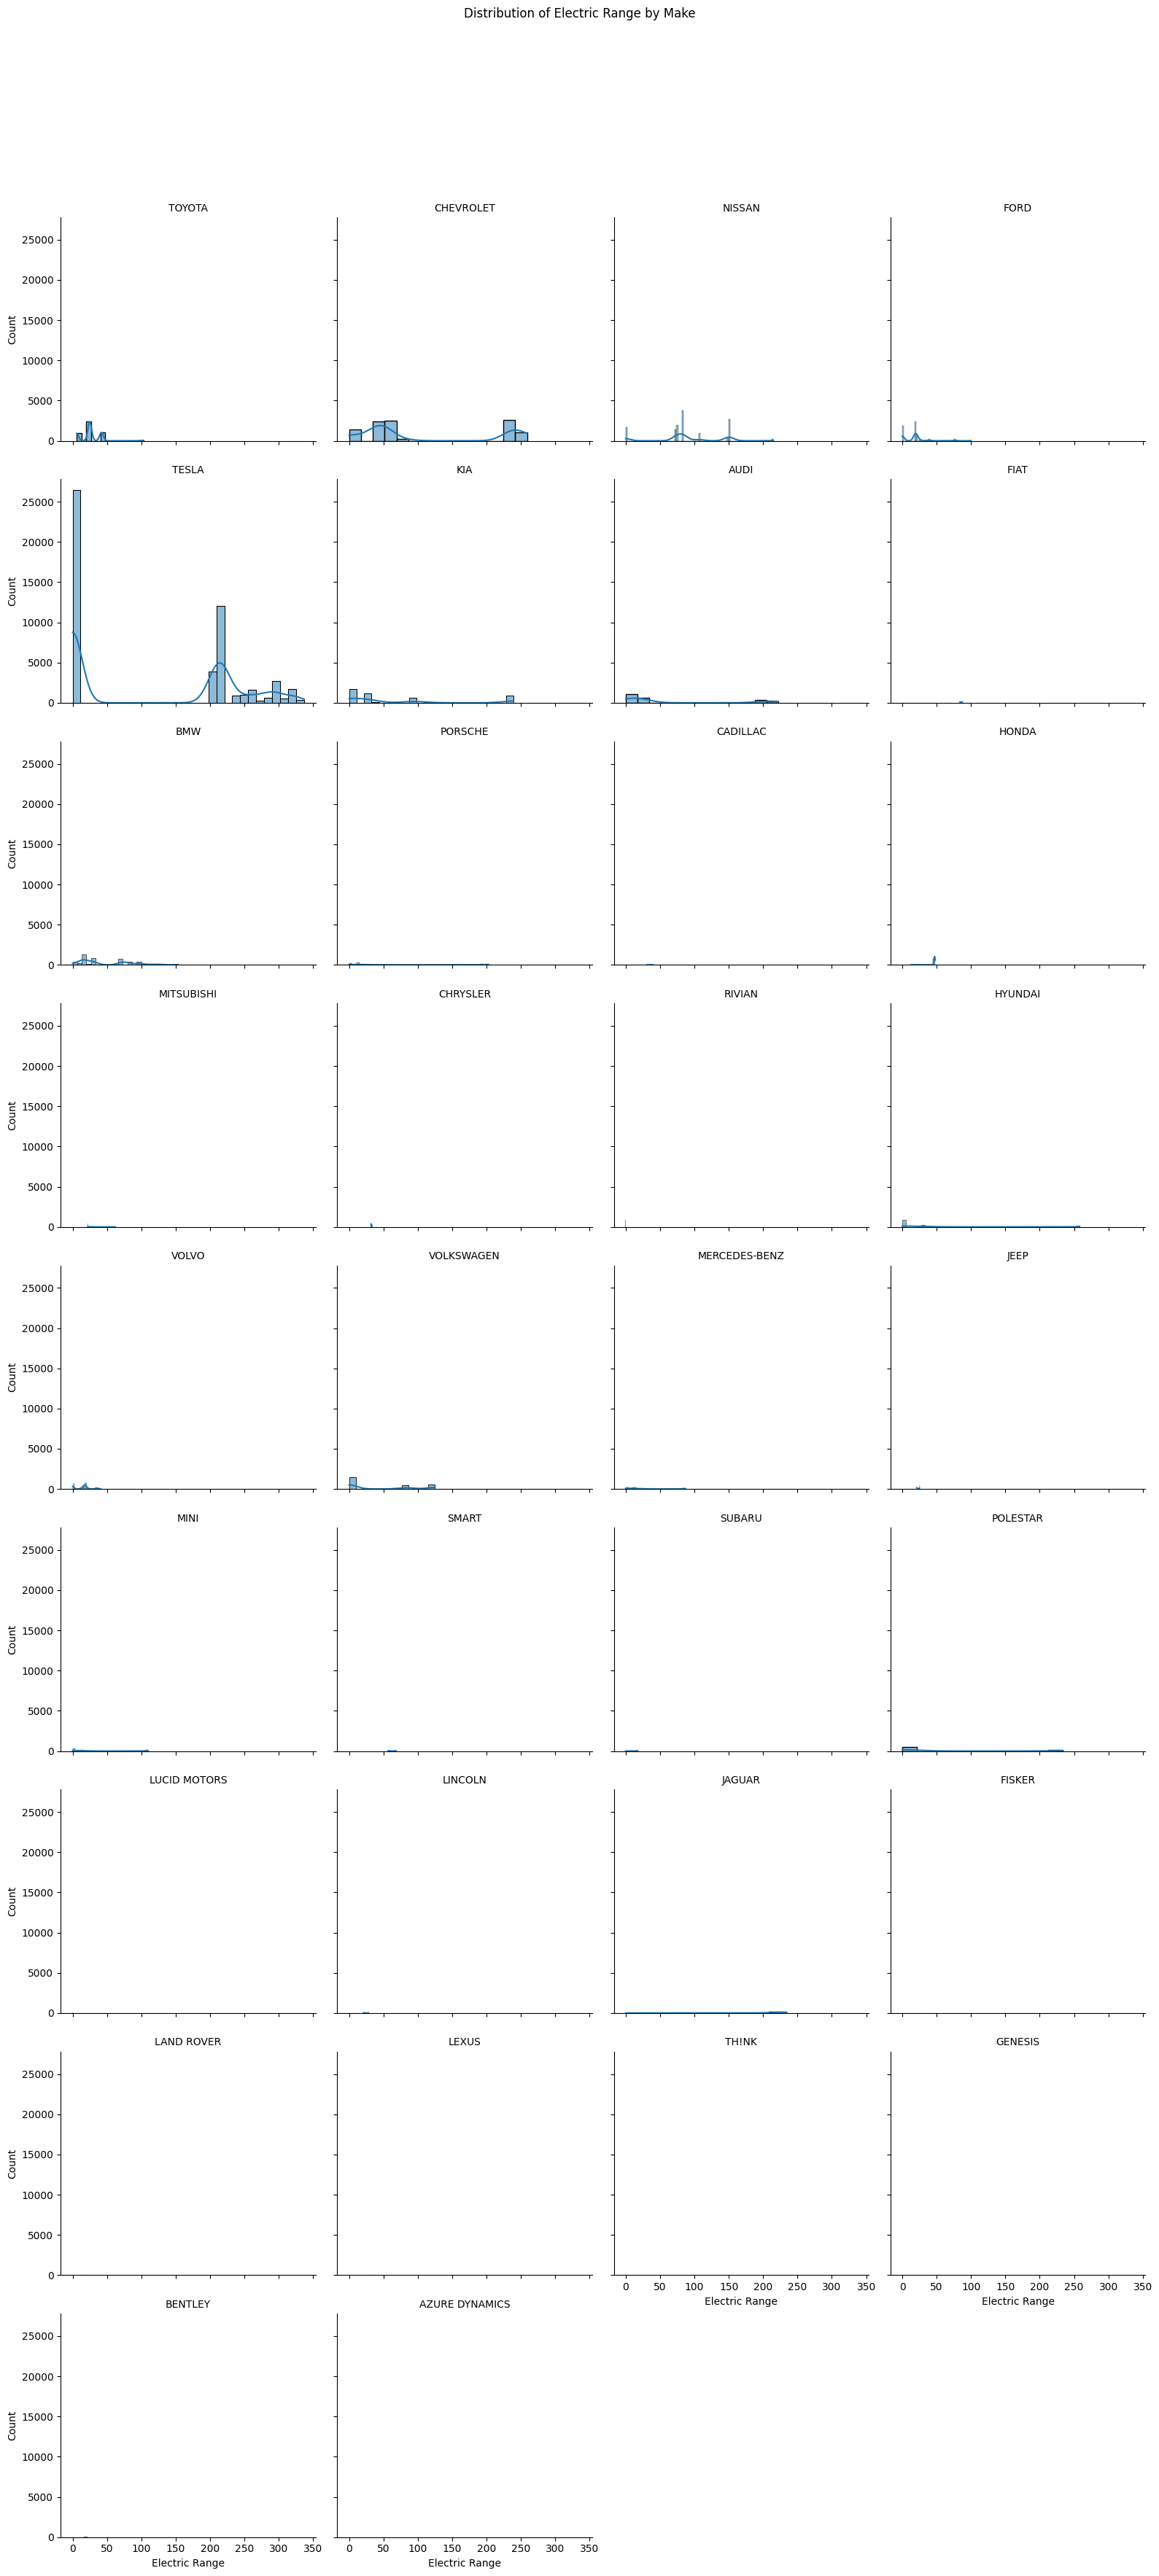

In [ ]:
g = sns.FacetGrid(df, col="Make", col_wrap=4, height=4)
g.map(sns.histplot, "Electric Range", kde=True)
g.set_titles(col_template="{col_name}")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of Electric Range by Make')
plt.show()


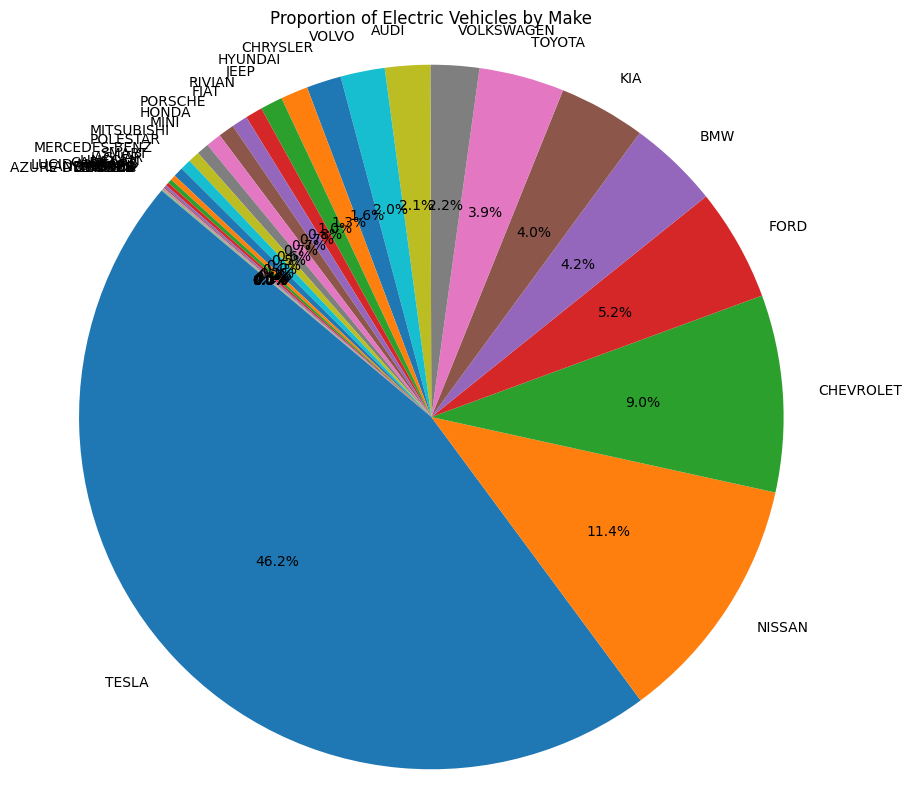

In [ ]:
make_counts = df['Make'].value_counts()
plt.figure(figsize=(10, 10))
plt.pie(make_counts, labels=make_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Electric Vehicles by Make')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is a circle.
plt.show()


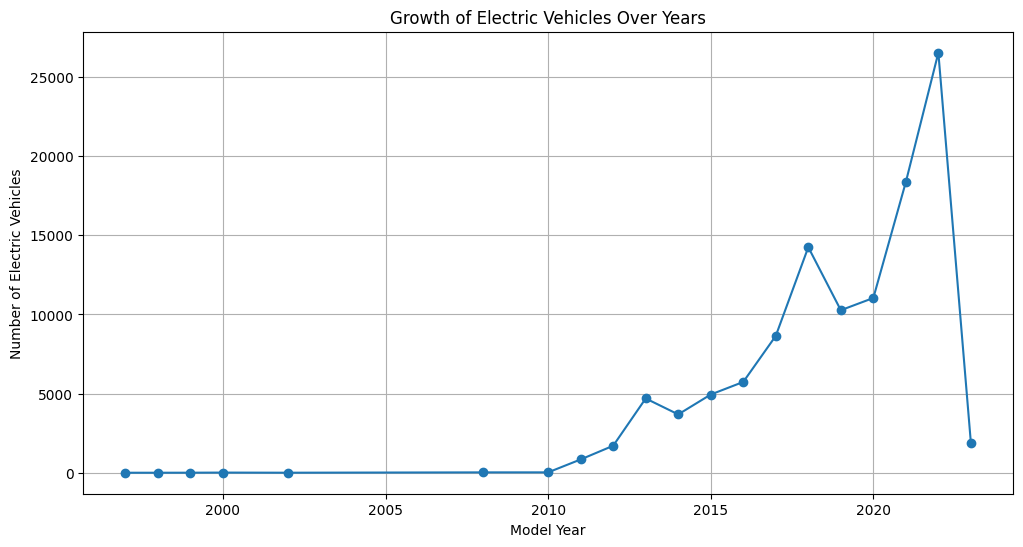

In [ ]:
# Group by Model Year and count the number of Electric Vehicles
yearly_counts = df.groupby('Model Year')['VIN (1-10)'].count()

plt.figure(figsize=(12, 6))
plt.plot(yearly_counts.index, yearly_counts.values, marker='o')
plt.title('Growth of Electric Vehicles Over Years')
plt.xlabel('Model Year')
plt.ylabel('Number of Electric Vehicles')
plt.grid()
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` 

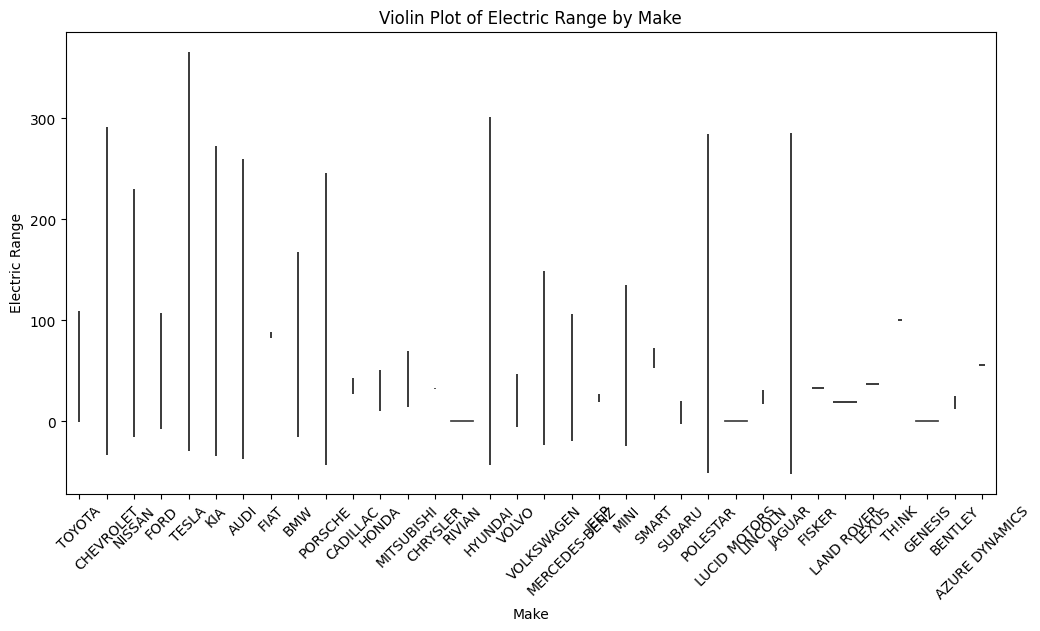

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='Make', y='Electric Range', inner='quartile')
plt.xticks(rotation=45)
plt.title('Violin Plot of Electric Range by Make')
plt.show()


Step 5: Create a Choropleth Map

Task 2: Choropleth Visualization

Objective: Display the number of electric vehicles by location (e.g., by state) using Plotly.

Instructions:

Group the dataset by the chosen location (e.g., State) and plot a choropleth map.

In [ ]:
# Create a dataframe for EV count by state
state_ev_count = df.groupby('State').size().reset_index(name='EV Count')

# Create a Choropleth map using Plotly
fig = px.choropleth(state_ev_count,
                    locations='State',
                    locationmode='USA-states',
                    color='EV Count',
                    scope='usa',
                    color_continuous_scale='Blues',
                    title="Electric Vehicle Count by State")
fig.show()


Step 6: Create a Racing Bar

Task 3: Racing Bar Plot Visualization

Objective: Create a Racing Bar Plot animation that shows the count of different EV makes over the years.

Instructions:

Group the dataset by 'Make' and 'Model Year' and create a racing bar plot animation.

In [ ]:
# Grouping by 'Make' and 'Model Year'
make_year_count = df.groupby(['Model Year', 'Make']).size().reset_index(name='EV Count')

# Racing Bar Plot using Plotly
fig = px.bar(make_year_count,
             x='Make',
             y='EV Count',
             color='Make',
             animation_frame='Model Year',
             title="Racing Bar Plot: EV Make Count over the Years")
fig.show()


In [ ]:
import pandas as pd
import plotly.express as px

# Grouping data by State
state_counts = df.groupby('State')['VIN (1-10)'].count().reset_index(name='EV Count')

# Creating the choropleth map
fig = px.choropleth(state_counts,
                    locations='State',
                    locationmode='USA-states',
                    color='EV Count',
                    color_continuous_scale='Viridis',
                    scope='usa',
                    labels={'EV Count': 'Number of Electric Vehicles'},
                    title='Number of Electric Vehicles by State')
fig.show()


In [ ]:
import pandas as pd
import plotly.express as px

# Grouping data by Make and Model Year
racing_data = df.groupby(['Make', 'Model Year'])['VIN (1-10)'].count().reset_index(name='Count')

# Create a racing bar plot
fig = px.bar(racing_data,
             x='Count',
             y='Make',
             color='Make',
             animation_frame='Model Year',
             range_x=[0, racing_data['Count'].max() + 1000],
             title='Racing Bar Plot: Count of Electric Vehicles by Make and Year',
             labels={'Count': 'Number of Electric Vehicles', 'Make': 'Make'})

fig.update_layout(yaxis=dict(title='Make'),
                  xaxis_title='Count of Electric Vehicles',
                  showlegend=False)

fig.show()


In [ ]:
import pandas as pd
import plotly.express as px


# Grouping data by Make and Model Year
racing_data = df.groupby(['Make', 'Model Year'])['VIN (1-10)'].count().reset_index(name='Count')

# Highlight top N makes
top_n = 10
top_makes = racing_data.groupby('Make')['Count'].sum().nlargest(top_n).index.tolist()

# Create a racing bar plot with enhanced features
fig = px.bar(
    racing_data,
    x='Count',
    y='Make',
    color='Make',
    animation_frame='Model Year',
    range_x=[0, racing_data['Count'].max() + 5000],
    title='Racing Bar Plot: Count of Electric Vehicles by Make and Year',
    labels={'Count': 'Number of Electric Vehicles'},
    template='plotly_dark'
)

# Highlighting top makes
fig.for_each_trace(lambda t: t.update(marker_color='rgba(0, 128, 0, 0.8)' if t.name in top_makes else 'rgba(211, 211, 211, 0.5)'))

# Add text annotations to each bar
fig.update_traces(texttemplate='%{x}', textposition='outside')

# Update layout for better visibility
fig.update_layout(
    yaxis_title='Make',
    xaxis_title='Count of Electric Vehicles',
    title_x=0.5,
    title_font=dict(size=24),
    height=600,
)

# Add hover data to show additional metrics
fig.update_traces(hovertemplate='Make: %{y}<br>Count: %{x}<br>Year: %{frame}')
fig.show()


In [ ]:
import plotly.express as px

fig = px.scatter_3d(df, x='Base MSRP', y='Electric Range', z='Model Year',
                    color='Make',
                    title='3D Scatter Plot of Electric Vehicles',
                    labels={'Base MSRP': 'Base MSRP', 'Electric Range': 'Electric Range', 'Model Year': 'Model Year'})
fig.show()


In [ ]:
import pandas as pd
import plotly.express as px

# Sample DataFrame creation
# df = pd.read_csv('your_electric_vehicle_data.csv')  # Load your dataset

# Grouping data by Make and Model Year
racing_data = df.groupby(['Make', 'Model Year'])['VIN (1-10)'].count().reset_index(name='Count')

# Highlight top N makes
top_n = 10
top_makes = racing_data.groupby('Make')['Count'].sum().nlargest(top_n).index.tolist()

# Create a racing bar plot with enhanced features
fig = px.bar(
    racing_data,
    x='Count',
    y='Make',
    color='Make',
    animation_frame='Model Year',
    range_x=[0, racing_data['Count'].max() + 5000],
    title='Racing Bar Plot: Count of Electric Vehicles by Make and Year',
    labels={'Count': 'Number of Electric Vehicles'},
    template='plotly_dark',
    height=800,  # Increase height for better visibility
    width=1200   # Increase width for better visibility
)

# Highlighting top makes
fig.for_each_trace(lambda t: t.update(marker_color='rgba(0, 128, 0, 0.8)' if t.name in top_makes else 'rgba(211, 211, 211, 0.5)'))

# Add text annotations to each bar
fig.update_traces(texttemplate='%{x}', textposition='outside')

# Update layout for better visibility
fig.update_layout(
    yaxis_title='Make',
    xaxis_title='Count of Electric Vehicles',
    title_x=0.5,
    title_font=dict(size=24),
    height=800,  # Adjusted height
    width=1200,  # Adjusted width
    font=dict(size=14),  # Increase font size for better readability
    plot_bgcolor='rgba(0, 0, 0, 0.7)',  # Darker background
    paper_bgcolor='rgba(0, 0, 0, 0.9)'   # Darker paper background
)

# Add hover data to show additional metrics
fig.update_traces(hovertemplate='Make: %{y}<br>Count: %{x}<br>Year: %{frame}')

# Show the plot
fig.show()
